In [1]:
!pip install tweepy

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Load the several dataset

In [3]:
d_twitter=pd.read_csv("/content/Twitter_Data.csv")

d_twitter.rename(columns = {'clean_text': 'text'}, inplace = True)




print(d_twitter.head())



                                                text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [4]:
# Load apple-twitter dataset
d_apple= pd.read_csv('/content/apple-twitter-sentiment-texts.csv')
d_apple= d_apple.rename(columns={'text': 'text', 'sentiment':'category'})
d_apple['category'] = d_apple['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
# Output first five rows

d_apple.head()

,text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [5]:
# Load finalSentimentdata2 dataset
d_sentiment = pd.read_csv('/content/finalSentimentdata2.csv')
d_sentiment = d_sentiment.rename(columns={'text': 'text', 'sentiment':'category'})
d_sentiment['category'] = d_sentiment['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
d_sentiment = d_sentiment.drop(['Unnamed: 0'], axis=1)
# Output first five rows
d_sentiment.head()

,category,text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...


In [6]:
# Load Tweet dataset
d_tweets = pd.read_csv('/content/Tweets.csv')
d_tweets = d_tweets.rename(columns={'text': 'text', 'airline_sentiment':'category'})
d_tweets['category'] = d_tweets['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
d_tweets =d_tweets[['category','text']]
# Output first five rows
d_tweets.head()

,category,text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...


In [7]:
data = pd.concat([d_twitter,d_apple, d_sentiment,d_tweets], ignore_index=True)

In [8]:
data.head()

,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
data.isnull().sum()

,0
text,4
category,7


In [10]:
data.dropna(axis=0, inplace=True)
data.shape

(182329, 2)

In [11]:
# Map tweet categories
data['category'] = data['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
data.head()

,text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [12]:
# The distribution of sentiments
data.groupby('category').count().plot(kind='bar')

In [13]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in data['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

In [14]:
import plotly.express as px
fig = px.pie(data, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

##Visible words

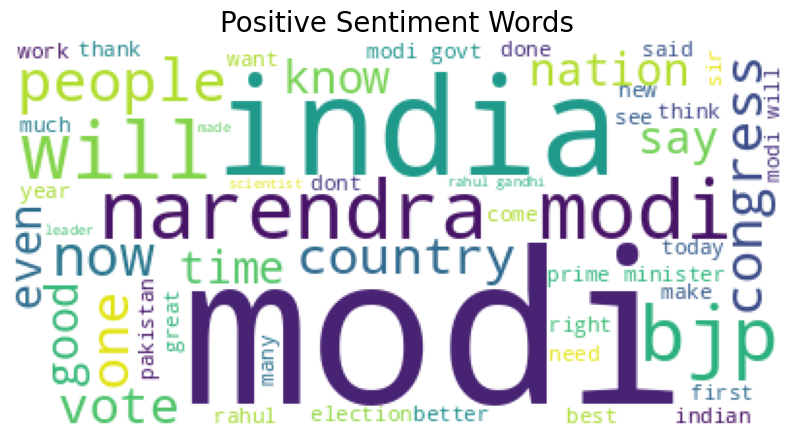

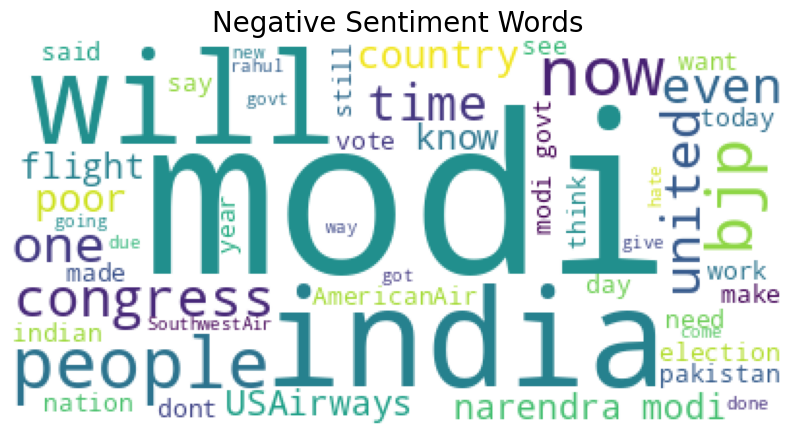

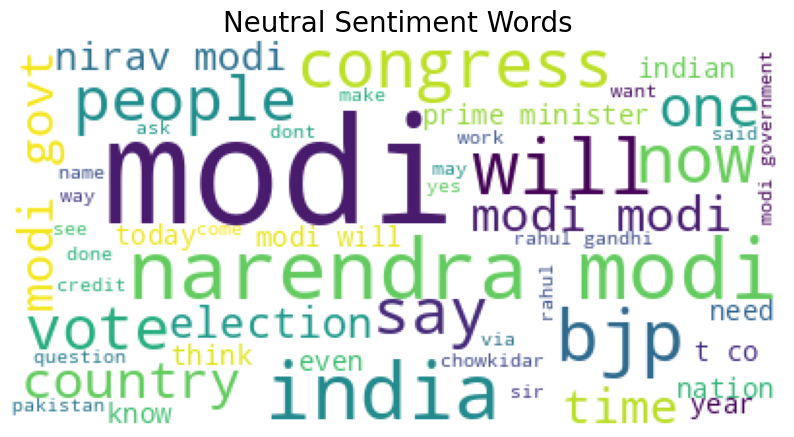

In [ ]:

from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(data, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in data[data.category==category]['text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(data, 'Positive')

# Negative tweet words
wordcount_gen(data, 'Negative')

# Neutral tweet words
wordcount_gen(data, 'Neutral')


##Preprocess the dataset

In [15]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", data['text'][0])
print("\nProcessed tweet ->", tweet_to_words(data['text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [16]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, data['text']))

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(data['category'])

##Tokenizing & Padding

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['text'][0])
X, tokenizer = tokenize_pad_sequences(data['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  349   73 1911 1180   44 2465    2 1259  219    2  236   32
  165  102   53   55 1184  236   50    3    6  533    3   50 3833    3
 3077    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [25]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [26]:
y = pd.get_dummies(data['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (109397, 50) (109397, 3)
Validation Set -> (36466, 50) (36466, 3)
Test Set -> (36466, 50) (36466, 3)


## Bidirectional LSTM

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [48]:
from tensorflow.keras.optimizers import Adam

vocab_size = 5000
embedding_size = 32
epochs=25
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#sgd = legacy_optimizers.SGD(lr=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_filename = 'Sentiment_Analysis_LSTM.keras'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_filename, save_best_only=True, monitor='val_loss',mode = 'min', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [51]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
               metrics=['accuracy', Precision(), Recall()])



In [52]:
# Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint])

Epoch 1/25
1704/1710 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7607 - loss: 0.5743 - precision_5: 0.8225 - recall_5: 0.6641
Epoch 1: val_loss improved from inf to 0.25103, saving model to Sentiment_Analysis_LSTM.keras
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 66s 10ms/step - accuracy: 0.7611 - loss: 0.5736 - precision_5: 0.8228 - recall_5: 0.6648 - val_accuracy: 0.9245 - val_loss: 0.2510 - val_precision_5: 0.9289 - val_recall_5: 0.9198
Epoch 2/25
1708/1710 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9259 - loss: 0.2508 - precision_5: 0.9319 - recall_5: 0.9200
Epoch 2: val_loss improved from 0.25103 to 0.23307, saving model to Sentiment_Analysis_LSTM.keras
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9259 - loss: 0.2507 - precision_5: 0.9319 - recall_5: 0.9200 - val_accuracy: 0.9298 - val_loss: 0.2331 - val_precision_5: 0.9351 - val_recall_5: 0.9248
Epoch 3/25
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9367 - loss: 0.2147 - precision_5: 0.9424 - recall_5: 0.9305

Model Evaluation

In [53]:
from keras.models import load_model

In [55]:
#Load model
model = load_model(r'/content/Sentiment_Analysis_LSTM.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9250
Precision : 0.9330
Recall    : 0.9172


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


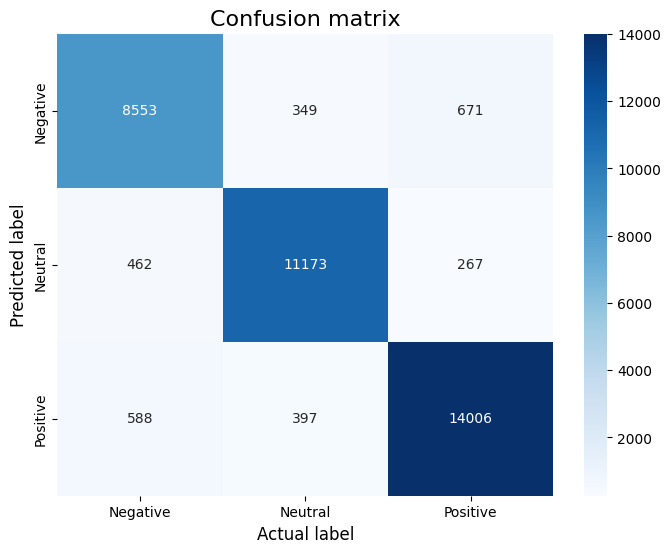

In [56]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

##Load model & get predictions

In [82]:
from keras.models import load_model

# Load model
model = load_model(r'/content/Sentiment_Analysis_LSTM.keras')

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    words = " ".join(words)
    # return list
    return words

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    words=tweet_to_words(tweet=text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([words])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [83]:
predict_class('I hate this')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
The predicted sentiment is Negative


In [89]:
predict_class('The item is good')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The predicted sentiment is Positive


In [85]:
predict_class('best product. thanks for given this')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The predicted sentiment is Positive
